# $k$-means clustering



## Example 1 (Mall_Customers data)

In the "Mall Customers" dataset, there are several variables that provide information about the customers. For instance

- Annual Income (k$): The annual income of the customer in thousands of dollars.

- Spending Score (1-100): A score assigned to the customer based on their spending habits and behavior. The score ranges from 1 to 100, with higher scores indicating higher spending.

These variables provide insights into the characteristics and behavior of customers in a mall. By analyzing this data, you can gain a better understanding of customer demographics, income levels, and spending patterns, which can be useful for market segmentation, targeted marketing strategies, and customer relationship management.

**Using the $k$-means method, cluster these customers into 5 groups.**

In [1]:
# Example 1
import os
os.chdir("/Users/marcusnkadimeng/Downloads/stk353/Notes/Machine Learning/23 Oct")

import pandas as pd
Mall_Customers = pd.read_csv("Mall_Customers.csv")
Mall_Customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
Mall_Customers = Mall_Customers.drop(["CustomerID", "Genre"], axis = 1)
Mall_Customers

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [3]:
new_names = {'Age': 'Age', 'Annual Income (k$)':'Income', 'Spending Score (1-100)': 'Score'}
Mall_Customers = Mall_Customers.rename(columns = new_names)
Mall_Customers

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


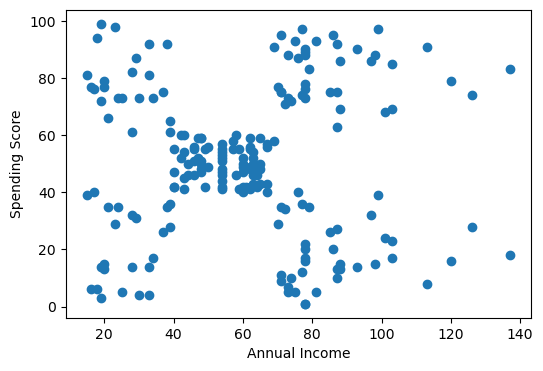

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
plt.scatter(Mall_Customers.Income, Mall_Customers.Score)
plt.ylabel("Spending Score")
plt.xlabel("Annual Income")
plt.show()

In [84]:
import numpy as np
from sklearn.cluster import KMeans

# Choosing the number of clusters
k = 5

# Initialize a KMeans object and then fit it on the data
kmeans = KMeans(n_clusters = k, n_init = 50, random_state = 12345)
kmeans.fit(Mall_Customers)

# Get the cluster labels for each data point
clusters = kmeans.labels_
centers = kmeans.cluster_centers_

Mall_Customers["Cluster"] = clusters + 1 # We add the clusters with 1 since it starts from 0.
Mall_Customers

,Age,Income,Score,Cluster
0,19,15,39,5
1,21,15,81,4
2,20,16,6,5
3,23,16,77,4
4,31,17,40,5
...,...,...,...,...
195,35,120,79,2
196,45,126,28,3
197,32,126,74,2
198,32,137,18,3


In [85]:
# Evaluation of the clustering 


Mall_Customers_0 = Mall_Customers[["Age", "Income", "Score"]]

## Explained variance ratio: between sum of squares / total sum of squares

wss = kmeans.inertia_ # within sum of squares

tss = np.sum(np.sum((Mall_Customers_0 - Mall_Customers_0.mean()) ** 2)) # total sum of squares
bss = tss - wss # between sum of squares

tss, wss, bss, bss / tss # The last item is the Explained variance ratio as our metric

(308812.78, 75423.31412020378, 233389.46587979625, 0.755763624419288)

In [86]:
# Evaluation of the clustering 

## Silhouette score
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(Mall_Customers_0, clusters)
silhouette_avg

0.44428597560893024

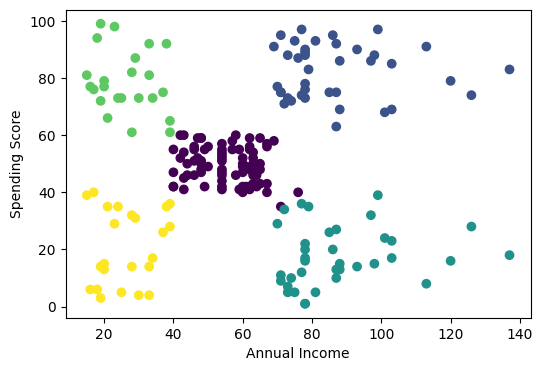

In [87]:
# Visualization of the results

import matplotlib.pyplot as plt

plt.figure(figsize = (6, 4))
plt.scatter(Mall_Customers.Income, Mall_Customers.Score, c = clusters)
plt.ylabel("Spending Score")
plt.xlabel("Annual Income")
plt.show()

In [9]:
# Interpreting the clustering results
# Cluster counts
# Cluster means
# Cluster standard deviations

In [72]:
# Cluster counts

Mall_Customers.groupby("Cluster").Cluster.count()

Cluster
1    39
2    21
3    53
4    37
5    50
Name: Cluster, dtype: int64

In [11]:
# Cluster means

Mall_Customers.groupby("Cluster").mean()

,Age,Income,Score
Cluster,,,
1,40.666667,87.750000,17.583333
2,43.088608,55.291139,49.569620
3,25.521739,26.304348,78.565217
4,45.217391,26.304348,20.913043
5,32.692308,86.538462,82.128205


In [12]:
# The above result is nothing but the cluster centres!
kmeans.cluster_centers_

array([[40.66666667, 87.75      , 17.58333333],
       [43.08860759, 55.29113924, 49.56962025],
       [25.52173913, 26.30434783, 78.56521739],
       [45.2173913 , 26.30434783, 20.91304348],
       [32.69230769, 86.53846154, 82.12820513]])

In [13]:
# Cluster standard deviations

Mall_Customers.groupby("Cluster").std()

,Age,Income,Score
Cluster,,,
1,11.496583,16.387059,10.204691
2,16.478572,8.710665,6.242295
3,5.273170,7.893811,10.953729
4,13.228607,7.893811,13.017167
5,3.728650,16.312485,9.364489


In [14]:
# All of the above metrics together:

Mall_Customers.groupby("Cluster").agg(['count', 'mean', 'std'])

Age                       Income                       Score   
        count       mean        std  count       mean        std count   
Cluster                                                                  
1          36  40.666667  11.496583     36  87.750000  16.387059    36  \
2          79  43.088608  16.478572     79  55.291139   8.710665    79   
3          23  25.521739   5.273170     23  26.304348   7.893811    23   
4          23  45.217391  13.228607     23  26.304348   7.893811    23   
5          39  32.692308   3.728650     39  86.538462  16.312485    39   

                               
              mean        std  
Cluster                        
1        17.583333  10.204691  
2        49.569620   6.242295  
3        78.565217  10.953729  
4        20.913043  13.017167  
5        82.128205   9.364489

## Example 2 (The 20 newsgroups text dataset)


In [5]:
from sklearn.datasets import fetch_20newsgroups

# Fetch the dataset
newsgroups_data = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))

In [6]:
print(newsgroups_data.DESCR)

.. _20newsgroups_dataset:

The 20 newsgroups text dataset
------------------------------

The 20 newsgroups dataset comprises around 18000 newsgroups posts on
20 topics split in two subsets: one for training (or development)
and the other one for testing (or for performance evaluation). The split
between the train and test set is based upon a messages posted before
and after a specific date.

This module contains two loaders. The first one,
:func:`sklearn.datasets.fetch_20newsgroups`,
returns a list of the raw texts that can be fed to text feature
extractors such as :class:`~sklearn.feature_extraction.text.CountVectorizer`
with custom parameters so as to extract feature vectors.
The second one, :func:`sklearn.datasets.fetch_20newsgroups_vectorized`,
returns ready-to-use features, i.e., it is not necessary to use a feature
extractor.

**Data Set Characteristics:**

    =================   ==========
    Classes                     20
    Samples total            18846
    Dimensionality

In [7]:
# Access the text data and target labels
text_data = newsgroups_data.data
type(text_data), len(text_data)

(list, 11314)

In [18]:
text_data

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

In [74]:
import numpy as np

np.random.seed(12345)


index = np.random.choice(range(len(text_data)), size = 1000, replace = False)
raw_text_data = [text_data[i] for i in index]

type(raw_text_data), len(raw_text_data)

(list, 1000)

In [77]:
# Step 2: First, we need to clean our text data set.
# We can create a module containing needed functions here.

from text_cleaner import text_cleaner

cleaned_text_data = text_cleaner(raw_text_data)
cleaned_text_data

<function text_cleaner.text_cleaner(txt)>

In [78]:
# You remember that for using the Naive Bayes on a text data set, we used the document-term matrix which 
# represents the frequency or presence of terms in a document collection. 
# There is an equivalent matrix called Term-frequency-Inverse-Document-Frequency (TF-IDF).
# It also represents the importance of terms by considering both the term frequency
# and the inverse document frequency. 

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Cleaning the data: Already done :)
# Step 2: Obtaining the TF-IDF matrix
vectorizer = TfidfVectorizer()
vectorized_text_data = vectorizer.fit_transform(cleaned_text_data)
vectorized_text_data.shape

(1000, 13141)

In [79]:
import numpy as np
from sklearn.cluster import KMeans

# Choosing the number of clusters
k = 6

# Initialize a KMeans object and then fit it on the data
kmeans = KMeans(n_clusters = k, n_init = 20, random_state = 1235)
kmeans.fit(vectorized_text_data)

# Get the cluster labels for each data point
clusters = kmeans.labels_
centers = kmeans.cluster_centers_
cleaned_text_data = pd.DataFrame(cleaned_text_data, columns = ["News"])
cleaned_text_data["Cluster"] = clusters
cleaned_text_data

,News,Cluster
0,gradynetcomcom suggest use common restricteddi...,5
1,order excitotoxin effect msg msg blood must go...,0
2,well folk mac plu final gave ghost weekend sta...,3
3,,0
4,believ vleisaisa motherboard use hint chipset ...,2
...,...,...
995,would mind post respons get also interest may ...,3
996,disagre mcnall demonstr gretzki star bring cro...,1
997,motorcycl liquidcool persuas brand coolant use...,3
998,theoret concept serious pursu freeman dyson et...,1


In [23]:
cleaned_text_data.groupby("Cluster").count()

,News
Cluster,
0,300
1,292
2,104
3,140
4,51
5,113


In [24]:
# wordcloud

## concatenate the messages:

def concatenate(df):
    cluster = ''
    for i in df.News.index:
        cluster = cluster + " " + df.News[i]
    return cluster

cluster_01 = concatenate(cleaned_text_data[cleaned_text_data.Cluster == 0])
cluster_02 = concatenate(cleaned_text_data[cleaned_text_data.Cluster == 1])
cluster_03 = concatenate(cleaned_text_data[cleaned_text_data.Cluster == 2])
cluster_04 = concatenate(cleaned_text_data[cleaned_text_data.Cluster == 3])
cluster_05 = concatenate(cleaned_text_data[cleaned_text_data.Cluster == 4])
cluster_06 = concatenate(cleaned_text_data[cleaned_text_data.Cluster == 5])
cluster_06

' gradynetcomcom suggest use common restricteddistribut privat key allow public key system encrypt post theori work fine long priva key remain secur practic would good idea check see would violat net rule practic custom etc dont say would would good idea check like rot everybodi key trivial would also good idea check see post would forward site need make chain work cours there problem discuss group travel facil entir control member probabl would also problem mail list approach might even fun make sens sinc new merced benz engin go l l noth btw beleiv number mb engin hp respect oneupmanship hp might induc bmw creat larger six also e lag behind er time wrt hp sure bavarian wouldnt want shownup schwabian ps mb engin havent releas yet mean disk dont tape forgot say whether look old newer sorri use work dont think would appreci anyon attend issa confer arlington va next week would appreci get touch turkey propistol automat weapon fanat dont seem realiz rest us laugh dont make angri make chu

Text(0.5, 1.0, 'Cluster_06')

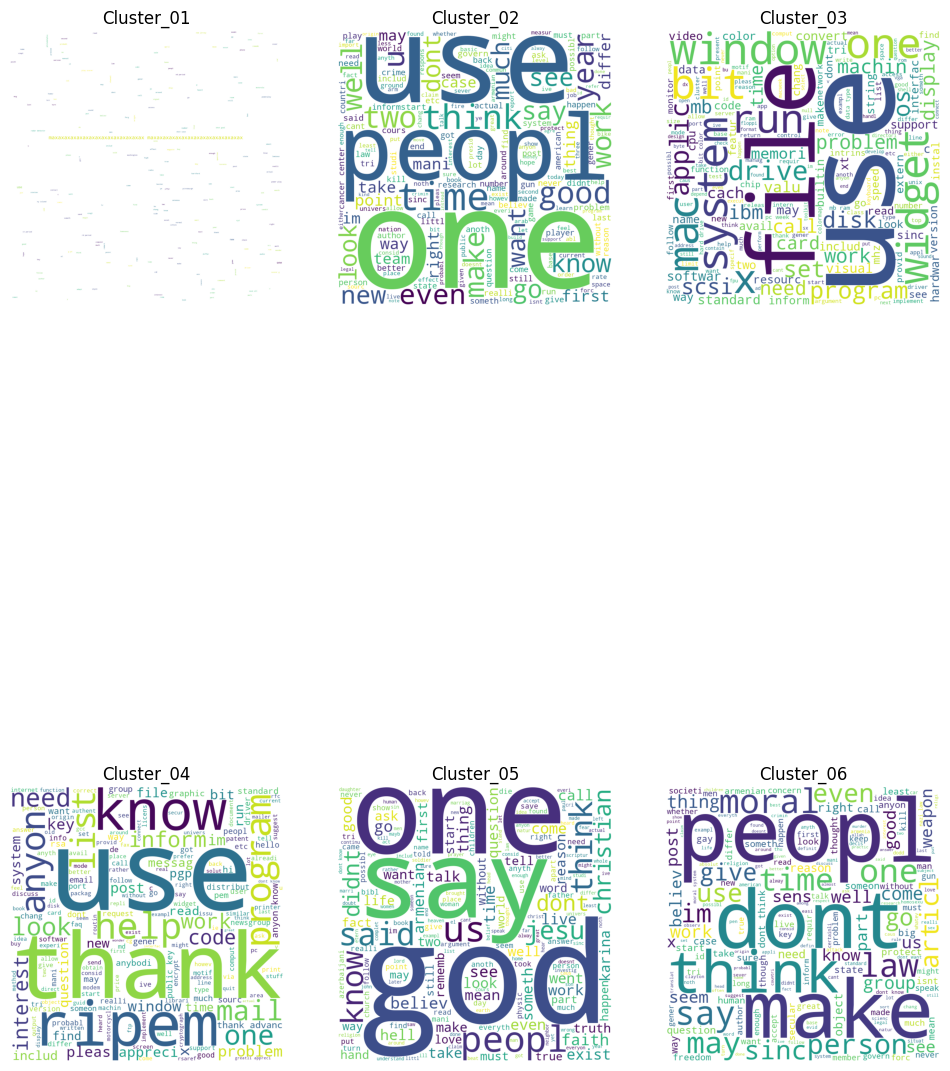

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_words(txt):
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 5,).generate(txt)
    plt.imshow(wordcloud)
    plt.axis("off")

plt.figure(figsize = (12, 18), facecolor = None)
plt.subplot(2, 3, 1)
plot_words(cluster_01)
plt.title("Cluster_01")
plt.subplot(2, 3, 2)
plot_words(cluster_02)
plt.title("Cluster_02")
plt.subplot(2, 3, 3)
plot_words(cluster_03)
plt.title("Cluster_03")
plt.subplot(2, 3, 4)
plot_words(cluster_04)
plt.title("Cluster_04")
plt.subplot(2, 3, 5)
plot_words(cluster_05)
plt.title("Cluster_05")
plt.subplot(2, 3, 6)
plot_words(cluster_06)
plt.title("Cluster_06")

In [82]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
fdist = FreqDist(word_tokenize(cluster_01))
fdist.most_common(10)

[('maxaxaxaxaxaxaxaxaxaxaxaxaxaxax', 547),
 ('use', 78),
 ('new', 71),
 ('one', 59),
 ('period', 57),
 ('x', 43),
 ('cd', 42),
 ('shot', 41),
 ('get', 38),
 ('vs', 36)]

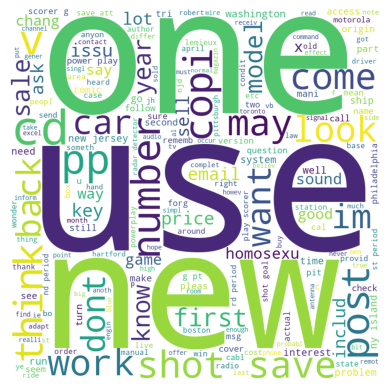

In [83]:
cluster_01 = cluster_01.replace('maxaxaxaxaxaxaxaxaxaxaxaxaxaxax', '')
plot_words(cluster_01)